In [1]:
!pip install scienceplots

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(('science','no-latex'))
plt.rcParams['axes.unicode_minus'] = False

In [7]:
data = pd.read_excel('../data/Sentometrics_US_Media_Climate_Change_Index.xlsx',
                   sheet_name = "2023 update monthly", skiprows=6, index_col=0, parse_dates=True)
data.head()

,Aggregate,cluster_Business Impact,cluster_Environmental Impact,cluster_Societal Debate,cluster_Research,Agreements/Actions,Agriculture Shifts,Airline Industry,Arctic Wildlife,Car Industry,...,Hurricanes/Floods,Legal Actions,Marine Wildlife,Political Campaign,Renewable Energy,Scientific Studies,Social Events,Tourism,UN/IPCC Reports,Water/Drought
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,0.670882,0.724689,0.634144,0.522989,0.540001,0.723770,0.579213,0.617377,0.473769,0.814800,...,0.219000,0.735931,0.281948,0.527560,0.355534,0.531972,0.443459,0.492221,0.440955,0.604657
2003-02-01,0.599651,0.681383,0.575126,0.358989,0.517911,0.711091,0.227526,0.492892,0.281511,0.513489,...,0.773497,0.870956,0.508305,0.260103,0.483923,0.496471,0.418194,0.468274,0.432443,0.466395
2003-03-01,0.405426,0.374329,0.454074,0.402151,0.322407,0.281523,0.263173,0.316483,0.129596,0.478289,...,0.241296,0.358616,0.295517,0.479183,0.543054,0.460373,0.324775,0.304384,0.262541,0.600739
2003-04-01,0.438446,0.436445,0.328511,0.457464,0.335117,0.355389,0.235146,0.655663,0.118261,0.338155,...,0.157286,0.535568,0.220386,0.593473,0.379494,0.474708,0.385128,0.308005,0.268713,0.409758
2003-05-01,0.375706,0.414676,0.294991,0.344434,0.262923,0.469369,0.314070,0.381374,0.068508,0.471628,...,0.258719,0.373385,0.274674,0.416606,0.395942,0.301688,0.278360,0.246417,0.168202,0.305166


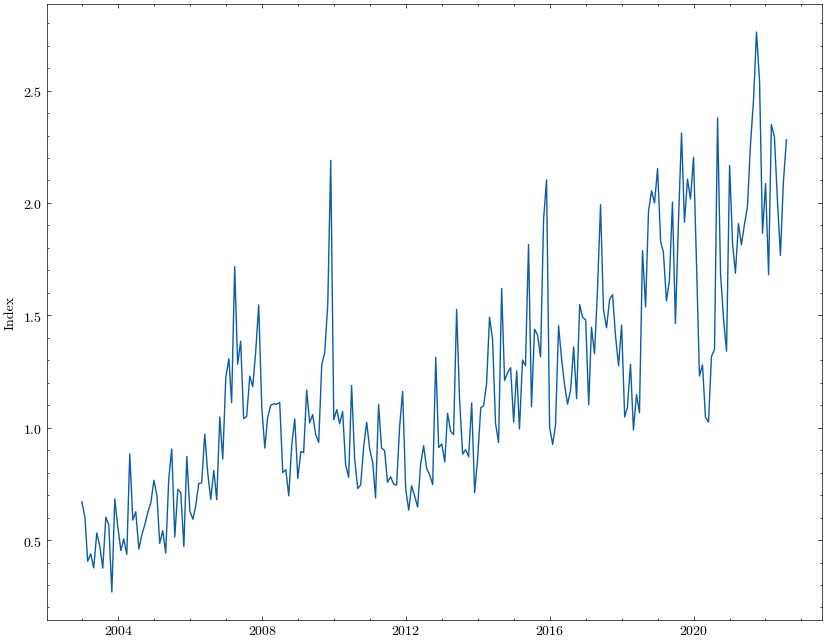

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(data['Aggregate'])
plt.ylabel('Index')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta_cc = -0.2  # Sensitivity to carbon tax
phi = 1.05  # AR(1) coefficient for carbon tax
sigma_tilde_CC = 0.5  # Standard deviation of the white noise in carbon tax

# Initial values
CC_t = 10  # Current carbon tax
T = 1  # Number of periods

# Initialize arrays to store values
CC = np.zeros(T+1)
E_CC = np.zeros(T+1)

# Set initial value for carbon tax
CC[0] = CC_t
E_CC[0] = CC_t

# Simulate the process
for t in range(T):
    E_CC[t+1] = phi * CC[t]
    CC[t+1] = E_CC[t] + np.random.normal(0, sigma_tilde_CC)

# Plot the results
plt.figure(figsize=(14, 6))

plt.plot(np.arange(T+1), E_CC, '-o', label='E_t(CC_{t+1})')
plt.plot(np.arange(T+1), CC, '--', label='CC_t')
plt.title('Expected and Actual Carbon Tax')
plt.xlabel('Time')
plt.ylabel('Carbon Tax')
plt.legend()
plt.show()


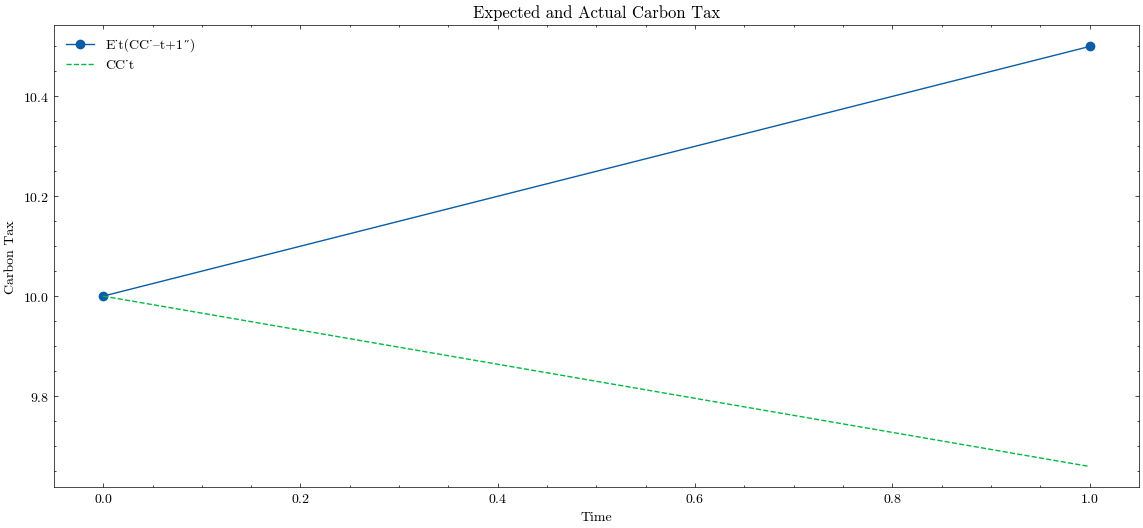

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta_m = 0  # Sensitivity to GDP growth
beta_cc = -0.2  # Sensitivity to carbon tax
phi = 1.05  # AR(1) coefficient for carbon tax
sigma_tilde_CC = 0.5  # Standard deviation of the white noise in carbon tax

# Initial values
M_t = 2.0  # Current GDP growth rate
CC_t = 10  # Current carbon tax
T = 1  # Number of periods

# Initialize arrays to store values
CC = np.zeros(T+1)
E_CC = np.zeros(T+1)
# E_X = np.zeros(T)

# Set initial value for carbon tax
CC[0] = CC_t
E_CC[0] = CC_t
# # Forecast GDP growth rate
# E_M_t1 = M_t + 0.5  # Expected GDP growth for the next period (this is just an assumption for illustration)

# Simulate the process
for t in range(T):
    E_CC[t+1] = phi * CC[t]
    CC[t+1] = E_CC[t] + np.random.normal(0, sigma_tilde_CC)
    # E_X[t] = beta_cc * E_CC[t]

# Plot the results
plt.figure(figsize=(14, 6))

plt.plot(np.arange(T+1), E_CC, '-o', label='E_t(CC_{t+1})')
plt.plot(np.arange(T+1), CC, '--', label='CC_t')
plt.title('Expected and Actual Carbon Tax')
plt.xlabel('Time')
plt.ylabel('Carbon Tax')
plt.legend()
plt.show()


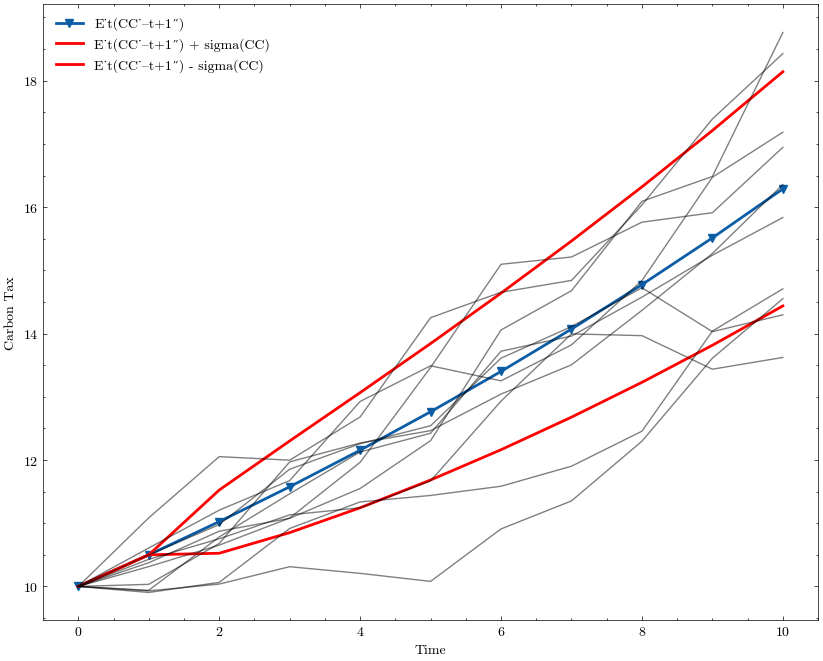

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta_cc = -0.2  # Sensitivity to carbon tax
phi = 1.05  # AR(1) coefficient for carbon tax
sigma_tilde_CC = 0.5  # Standard deviation of the white noise in carbon tax

# Initial values
CC_t = 10  # Current carbon tax
T = 10  # Number of periods
simsize = 10  # Number of simulations

# Initialize arrays to store values
CC = np.zeros((T+1, simsize))
E_CC = np.zeros(T+1)
sig_CC = np.zeros(T+1)

# Set initial value for carbon tax
CC[0, :] = CC_t
E_CC[0] = CC_t

# Simulate the process
for t in range(T):
    E_CC[t+1] = phi * E_CC[t]
    sig_CC[t+1] = sigma_tilde_CC * np.sqrt((1 - phi**(2*(t))) / (1 - phi**2))
    for i in range(simsize):
        CC[t+1, i] = phi * CC[t, i] + np.random.normal(0, sigma_tilde_CC)

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(np.arange(T+1), E_CC, '-v', linewidth=2, label='E_t(CC_{t+1})')
plt.plot(np.arange(T+1), E_CC + sig_CC, '-r', linewidth=2, label='E_t(CC_{t+1}) + sigma(CC)')
plt.plot(np.arange(T+1), E_CC - sig_CC, '-r', linewidth=2, label='E_t(CC_{t+1}) - sigma(CC)')
for i in range(simsize):
    plt.plot(np.arange(T+1), CC[:, i], '-k', alpha=0.5)
# plt.plot(np.arange(T+1), np.zeros(T+1), '-k')
# plt.title('Expected and Actual Carbon Tax with Simulations')
plt.xlabel('Time')
plt.ylabel('Carbon Tax')
plt.legend()
# plt.grid(True)
plt.savefig('../images/chapter01/carbon_tax_simulations.png', dpi=300)
plt.show()


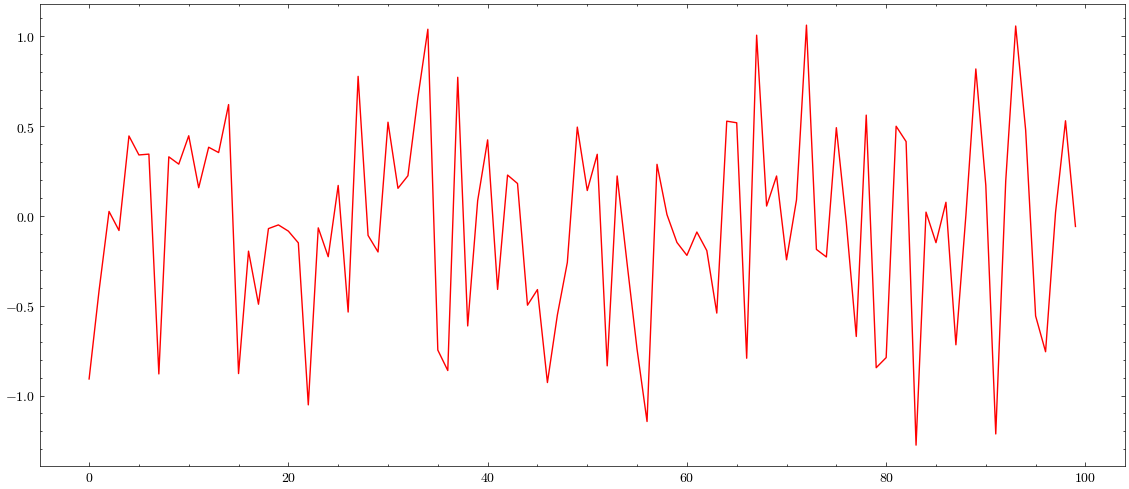

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
phi = 0.8  # AR(1) coefficient
sigma_epsilon = 0.5  # Standard deviation of the error term
T = 100  # Number of time periods

# Initialize arrays
R = np.zeros(T)
epsilon = np.random.normal(0, sigma_epsilon, T)

# Plot the simulated returns and the unexpected component (risk)
plt.figure(figsize=(14, 6))


plt.plot(epsilon, label='ε_t (Unexpected Component)', color='r')
# plt.title('Unexpected Component (Risk) in AR(1) Process')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
plt.savefig('../images/chapter01/unexpected_shocks.png')
plt.show()


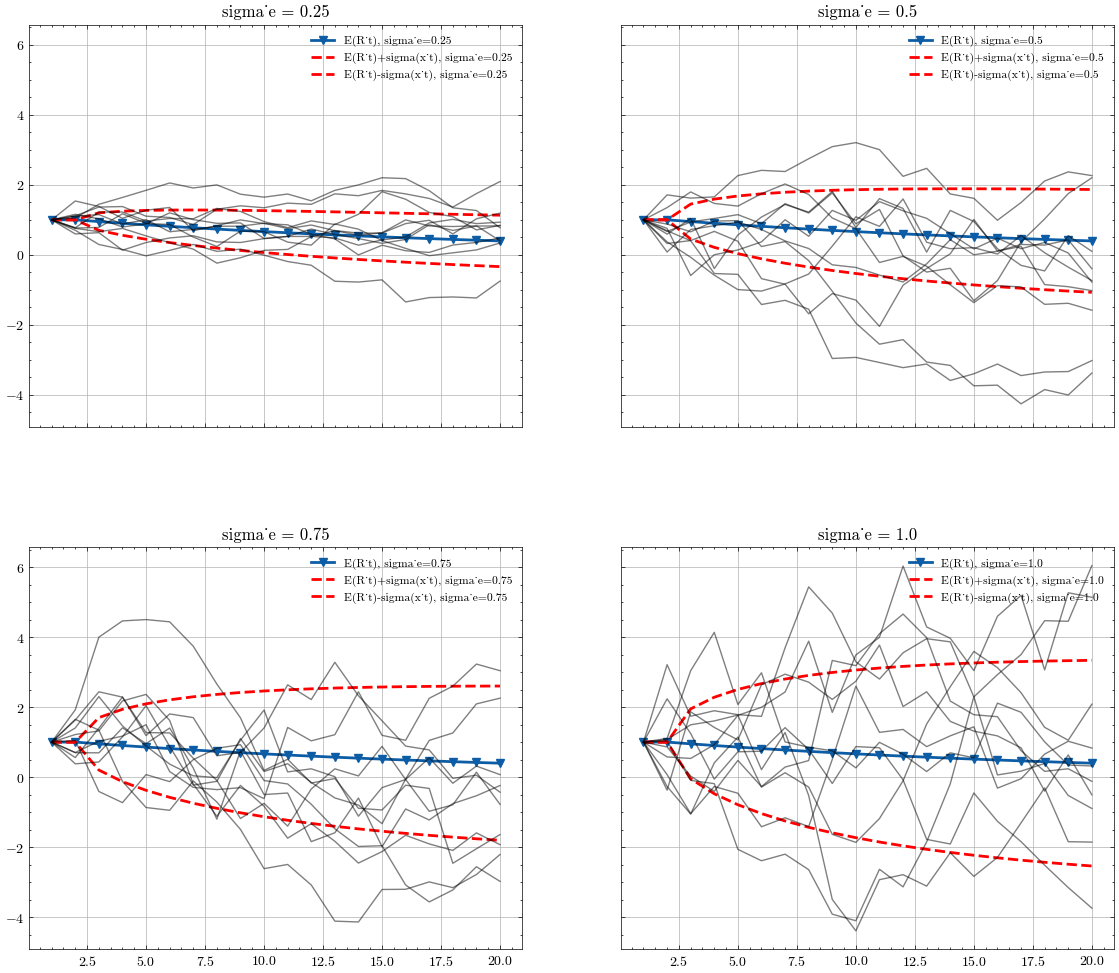

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate AR(1) process
def simulate_ar1(sige, rho=0.95, simsize=10, T=20):
    Ext = np.zeros(T)
    xt = np.zeros((T, simsize))
    sigxt = np.zeros(T)
    Ext[0] = 1
    xt[0, :] = 1 * np.ones(simsize)
    sigxt[0] = 0
    
    for t in range(1, T):
        Ext[t] = rho**(t-1) * Ext[0]
        sigxt[t] = np.sqrt((1 - rho**(2*(t-1))) / (1 - rho**2)) * sige
        xt[t, :] = rho * xt[t-1, :] + sige * np.random.randn(simsize)
    
    return Ext, sigxt, xt

# Parameters
rho = 0.95
simsize = 10
T = 20
sige_values = [0.25, 0.5, 0.75, 1.0]  # Different sigma_e values to compare

fig, axs = plt.subplots(2, 2, figsize=(14, 12), sharex=True, sharey=True)

for i, sige in enumerate(sige_values):
    Ext, sigxt, xt = simulate_ar1(sige, rho, simsize, T)
    ax = axs[i//2, i%2]
    ax.plot(np.arange(1, T+1), Ext, '-v', linewidth=2, label=f'E(R_t), sigma_e={sige}')
    ax.plot(np.arange(1, T+1), Ext + sigxt, '--r', linewidth=2, label=f'E(R_t)+sigma(x_t), sigma_e={sige}')
    ax.plot(np.arange(1, T+1), Ext - sigxt, '--r', linewidth=2, label=f'E(R_t)-sigma(x_t), sigma_e={sige}')
    for j in range(simsize):
        ax.plot(np.arange(1, T+1), xt[:, j], '-k', alpha=0.5)
    ax.set_title(f'sigma_e = {sige}')
    ax.grid(True)
    ax.legend(loc='upper right', fontsize='small')

# Common labels
# fig.text(0.5, 0.04, 'Time', ha='center')
# fig.text(0.04, 0.5, 'Value', va='center', rotation='vertical')
# fig.suptitle('Impact of Higher Uncertainty on AR(1) Process', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.savefig('../images/chapter01/ar_1.png')
plt.show()
